# Processing of Datasets 

Notebook for processing different dataset, inculding finacical: Bitcoin, Ethereum etc.

In [1]:
%matplotlib inline
import csv
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import collections
import numpy as np
import ast
import pandas as pd
import io
from random import random

## Ethereum dataset

In [2]:
# token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash
# hash, nonce,transaction_index,from_address,to_address,value,
# gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used
# ,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash
G = nx.DiGraph()
first = True
a_id = dict()
ind = 1
max_w = 1
max_ind = None
with open("Datasets/Ethereum/eth-tran_000000000000") as f: 
    val = f.readline()
    print(val)
    while len(val)!=0:        
        val = f.readline()
        if len(val)==0:
            break
        val = val.split(',')
        from_adr = val[3]
        to_adr = val[4]
        value = val[5]
        if int(value) == 0:
            continue
        if from_adr not in a_id:
            a_id[from_adr] = ind
            ind += 1
        if to_adr not in a_id:
            a_id[to_adr] = ind
            ind += 1
        if G.has_edge(a_id[from_adr], a_id[to_adr]):
            G[a_id[from_adr]][a_id[to_adr]]["weight"] += 1
            if G[a_id[from_adr]][a_id[to_adr]]["weight"] > max_w:
                max_w = G[a_id[from_adr]][a_id[to_adr]]["weight"]
                max_ind = (a_id[from_adr], a_id[to_adr])
        else:
            G.add_edge(a_id[from_adr], a_id[to_adr], weight=1) 

hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash



### Graph result

16495
23053
2498
(8354, 6345)


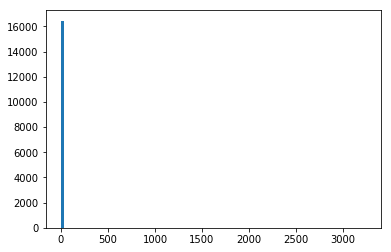

In [3]:
print(G.number_of_nodes())
print(G.number_of_edges())
print(max_w)
print(max_ind)

x = sorted([d for n, d in G.degree()], reverse=True)

fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, rectangles = ax.hist(x, 100, density=False)
fig.canvas.draw()
plt.show()

### Cleaned graph

In [20]:
G.number_of_nodes()

16495

2

In [19]:
G.number_of_edges()

23053

In [72]:
# Choose nodes with top degree
x = sorted([(d,n) for n, d in G.degree()], reverse=False)
min_val = 3
remove = []
for v in x:
    e = list(G.edges(nbunch=v[1]))
    if len(e) > 1:
        break
    # ['weight']
    if len(e) == 0:
        w2 = list(G.in_edges(v[1], data=True))[0][2]['weight']
        if w2 < min_val:
            remove.append(v[1])
        continue
    data = G.get_edge_data(e[0][0], e[0][1])
    if 'weight' not in data:
        print(data)
        print(v)
    else:
        w = data['weight']
        if w < min_val:
            remove.append(v[1])

In [73]:
G1 = G.copy()
print("Number of edges removed ", len(remove))
G1.remove_nodes_from(remove)

Number of edges removed  8375


In [78]:
# Choose nodes with top degree
x = sorted([(d,n) for n, d in G1.degree()], reverse=False)
min_val = 3
remove = []
for v in x:
    e = list(G1.edges(nbunch=v[1]))
    if v[0] == 0:
        remove.append(v[1])
        continue
    if len(e) > 1:
        break
    # ['weight']
    if len(e) == 0:
        w2 = list(G1.in_edges(v[1], data=True))[0][2]['weight']
        if w2 < min_val:
            remove.append(v[1])
        continue
    data = G1.get_edge_data(e[0][0], e[0][1])
    if 'weight' not in data:
        print(data)
        print(v)
    else:
        w = data['weight']
        if w < min_val:
            remove.append(v[1])

In [82]:
G1.remove_nodes_from(remove)

In [88]:
G1.number_of_nodes()

7732

In [90]:
nx.write_gml(G1, "Datasets/eth-graph.gml")

7732
14387


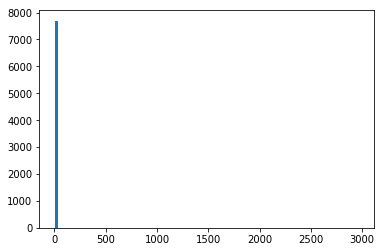

In [89]:
print(G1.number_of_nodes())
print(G1.number_of_edges())
x = sorted([d for n, d in G1.degree()], reverse=True)

fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, rectangles = ax.hist(x, 100, density=False)
fig.canvas.draw()
plt.show()

3

### Number of interactions

In [18]:
# Top interactions between the top-degree parties  
max_weight = 0
max_e = None

for e in G1.edges():
    if max_weight < G1.get_edge_data(e[0], e[1])['weight']:
        max_weight = G1.get_edge_data(e[0], e[1])['weight']
        max_e = e

print(max_weight)
print(max_e)
print(G.degree(max_e[0]))
print(G.degree(max_e[1]))
    

328
(6337, 2)
1267
1495


In [17]:
# Top interactions between the all parties 
max_weight = 0
max_e = None

for e in G.edges():
    if max_weight < G.get_edge_data(e[0], e[1])['weight']:
        max_weight = G.get_edge_data(e[0], e[1])['weight']
        max_e = e

print(max_weight)
print(max_e)
print(G.degree(max_e[0]))
print(G.degree(max_e[1]))
    

2498
(8354, 6345)
136
2
